 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [137]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [138]:
# Reading whale returns
whale_returns_csv = Path("Data/whale_returns.csv")
algo_returns_csv = Path("Data/algo_returns.csv")
sp500_history_csv = Path("Data/sp500_history.csv")

whale_returns_csv= pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_csv= pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_csv= pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [139]:
# Count nulls

whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [140]:
# Drop nulls

whale_returns_csv = whale_returns_csv.dropna().copy()
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [141]:
# Reading algorithmic returns
algo_returns_csv = Path("Data/algo_returns.csv")
algo_returns_csv= pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [142]:
# Count nulls
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [143]:
# Drop nulls
algo_returns_csv = algo_returns_csv.dropna().copy()
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [144]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Data/sp500_history.csv")

sp500_history_data= pd.read_csv(
    sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True
)
sp500_history_data = sp500_history_data.sort_index()
sp500_history_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [145]:
# Check Data Types

sp500_history_data.dtypes

Close    object
dtype: object

In [146]:
# Fix Data Types
sp500_history_data["Close"] = sp500_history_data["Close"].str.replace('$', '').astype(float)
sp500_history_data.dtypes

Close    float64
dtype: object

In [147]:
# Calculate Daily Returns

SP_daily_returns = sp500_history_data.pct_change()
SP_daily_returns.sort_index()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [148]:
# Drop nulls
SP_daily_returns = SP_daily_returns.dropna()
SP_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [149]:
# Rename Column

SP_daily_returns.columns = ["S&P 500"]
SP_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [150]:
# Concatenate all DataFrames into a single DataFrame

combined_df = pd.concat([whale_returns_csv, algo_returns_csv, SP_daily_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500?

### Based on the cumulative returns plot, it looks like Algo 1 is currently outperforming the S&P 500.

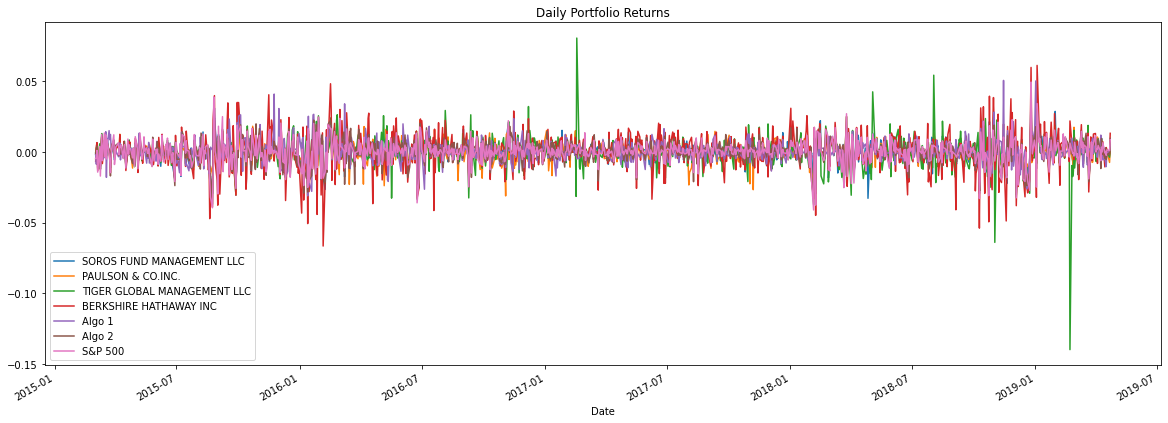

In [151]:
# Plot daily returns

combined_df.plot(figsize=(20,7), title = "Daily Portfolio Returns")

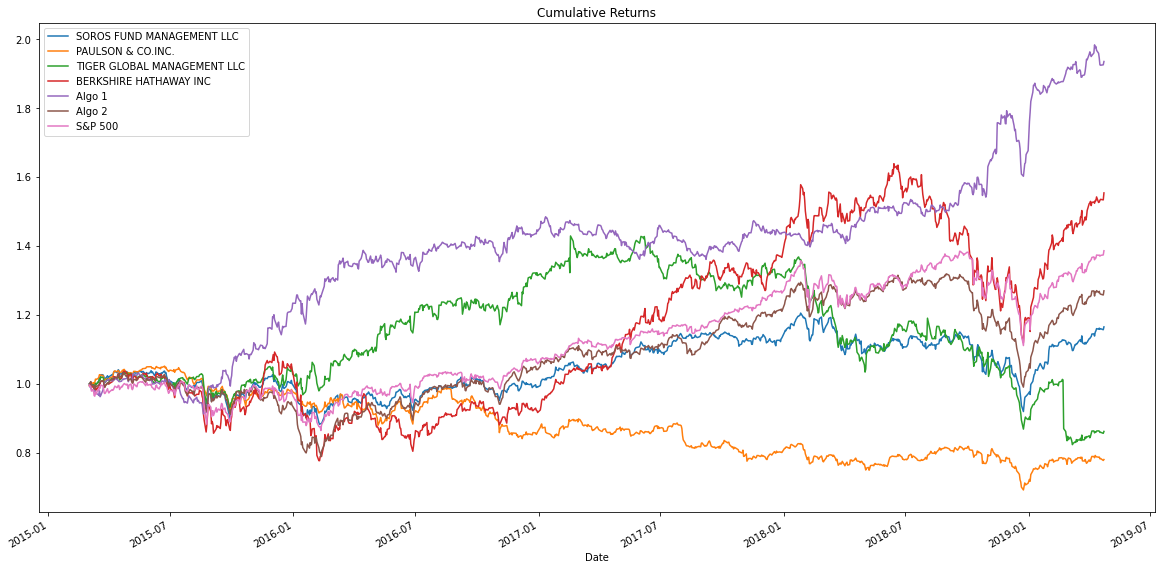

In [152]:
# Plot cumulative returns

# Solve for cumulative returns:
cumulative_returns = (1+ combined_df).cumprod()
# Plot cumulative returns:
cumulative_returns.plot(figsize=(20,10), title = "Cumulative Returns")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
  ###  - Based on the box plot, standard deviation calculation and volatility calculation Tiger Global Managment and Berkshire Hathaway Inc are risker than the S&P 500.
5. Calculate the Annualized Standard Deviation

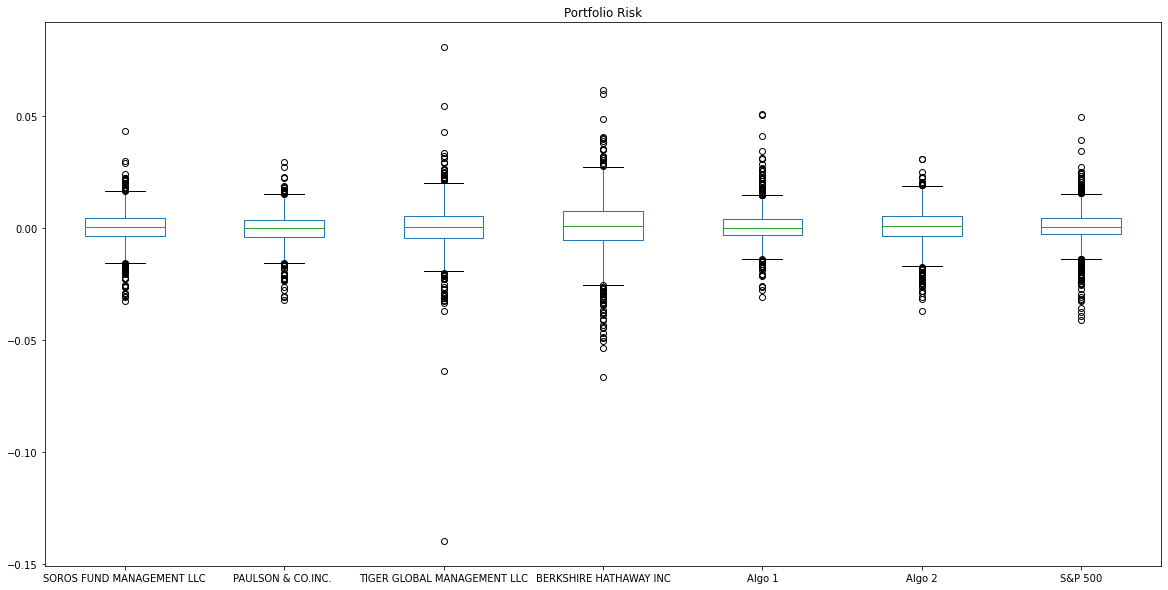

In [153]:
# Box plot to visually show risk

combined_df.plot.box(figsize=(20,10), title ="Portfolio Risk")

In [154]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

combined_df_std = combined_df.std() 
combined_df_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [155]:
# Determine which portfolios are riskier than the S&P 500
#Calculating for volatility.

Riskier = combined_df_std > combined_df_std["S&P 500"]
Riskier

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [156]:
# Calculate the annualized standard deviation (252 trading days)

combined_df_astd = combined_df_std * np.sqrt(252)
combined_df_astd

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
  ### - Risk increases at the same time as the S&P 500 due to the high possibility of each portfolio being constructed of mostly equities. 
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
  ### - The portfolio that mostly mimics the SP500 is portfolio Algo 2 as it has a correlation of 0.85 compared to the S&P 500. 
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
  ### - Algo 1 is sensitive to movement of the S&P 500, however, based on its low correlation value it will not mimic S&P 500 returns. 
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

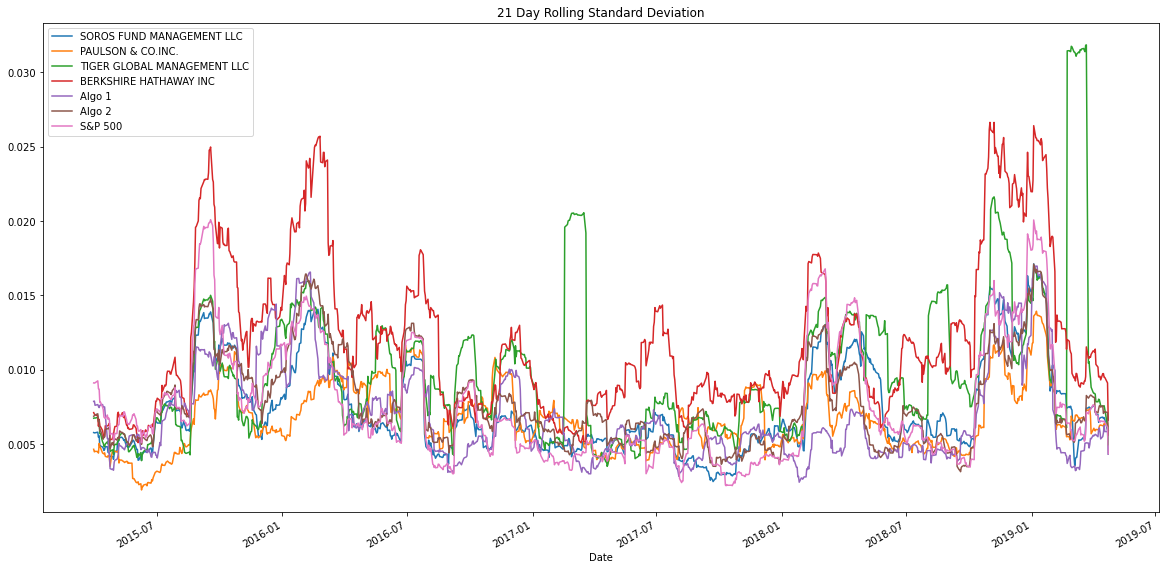

In [157]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

combined_df.rolling(window=21).std().plot(figsize=(20,10), title ="21 Day Rolling Standard Deviation")

In [158]:
# Construct a correlation table

combined_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


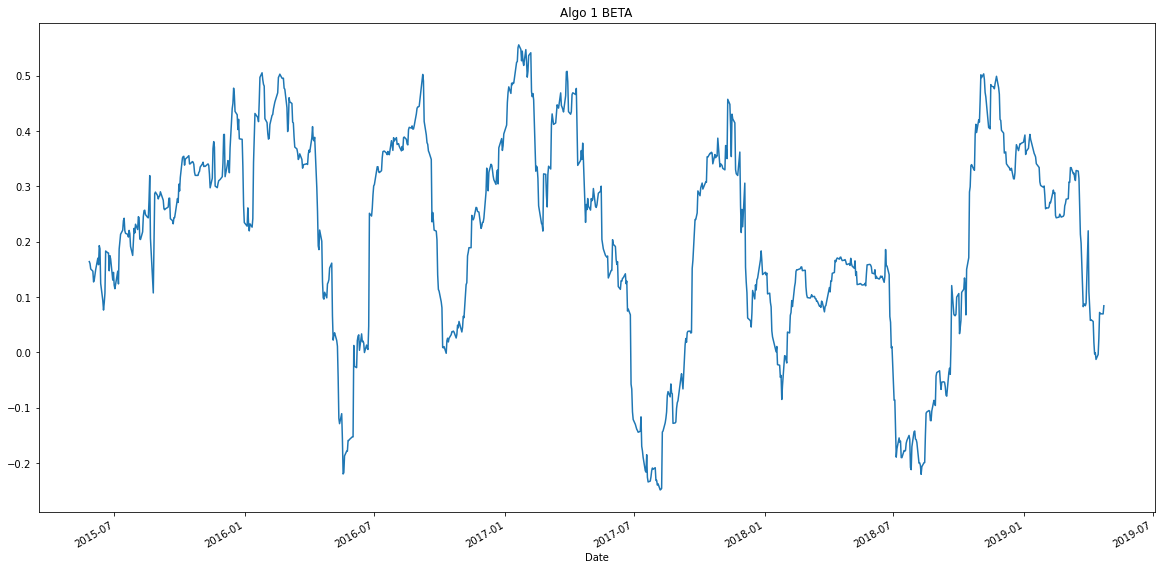

In [159]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

rolling_covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_variance = combined_df["S&P 500"].rolling(window=60).var()                                                                           
rolling_beta= rolling_covariance / rolling_variance 
rolling_beta.plot(figsize=(20,10), title="Algo 1 BETA")

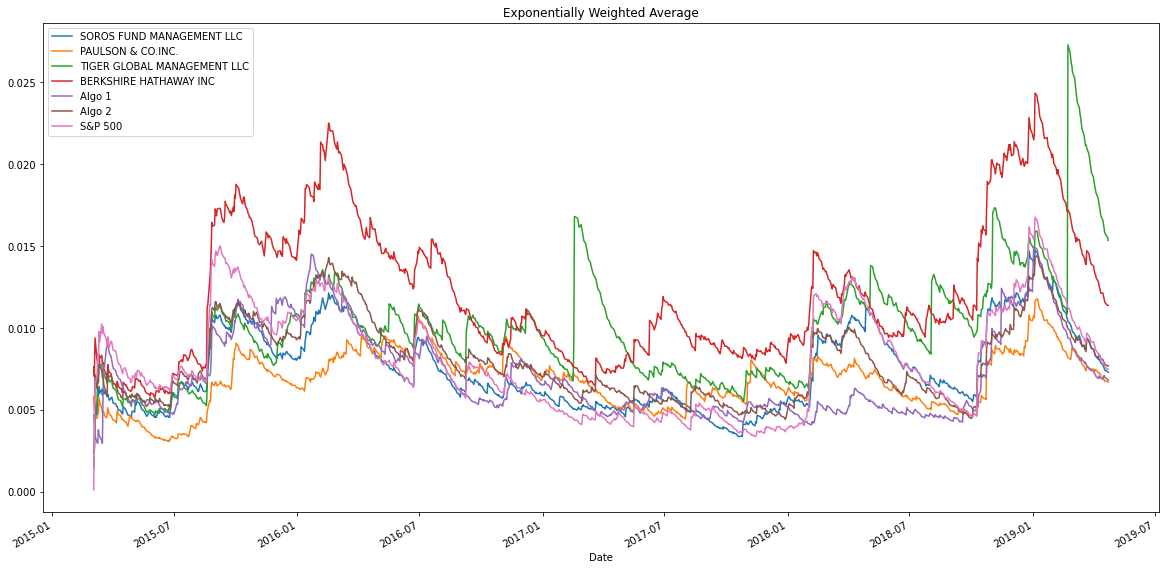

In [161]:
# Calculate a rolling window using the exponentially weighted moving average. 

weighted_moving_average = combined_df.ewm(halflife=21, adjust=True).std().plot(title="Exponentially Weighted Average", figsize =(20,10))
weighted_moving_average

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
   ### - With a Sharpe ratios above 1, Algo 1 will more than likely outperform the S&P 500 and the whale portfolios with less risk which will also be extremely attractive for many investors.

In [162]:
# Calculate annualized Sharpe Ratios

sharpe_ratio = (combined_df).mean()*252/(combined_df.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

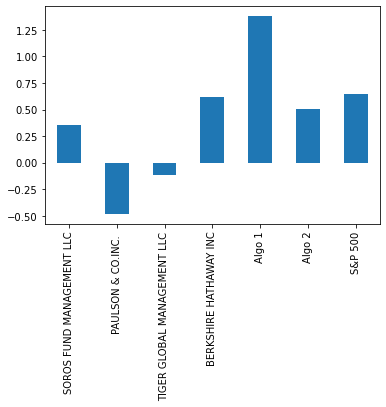

In [163]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratio.plot(kind="bar")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? 
### - The only algo portfolio that will outperform both the market and whale portfolio is Algo1 as it has low risk and the hishest Sharpe ratio.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?
### - Based on standard deviation and Sharpe ration my portfolio will not outperform neither the market nor the whale portfolios, however, it will perform very close to the S&P 500. 


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [164]:
# Read the first stock
FCX = Path("Data/FCX.csv")
FCX_df= pd.read_csv(FCX, index_col="Date", infer_datetime_format=True, parse_dates=True)
#FCX_df = FCX_df.sort_index()
FCX_df.head()

,Symbols,Close
Date,,
2015-01-02 16:00:00,FCX,23.55
2015-01-05 16:00:00,FCX,22.15
2015-01-06 16:00:00,FCX,22.53
2015-01-07 16:00:00,FCX,22.86
2015-01-08 16:00:00,FCX,23.37


In [165]:
# Read the second stock

INTC = Path("Data/INTC.csv")
INTC_df= pd.read_csv(INTC, index_col="Date", infer_datetime_format=True, parse_dates=True)
#INTC_df = INTC_df.sort_index()
INTC_df.head()

,Symbols,Close
Date,,
2015-01-02 16:00:00,INTC,36.36
2015-01-05 16:00:00,INTC,35.95
2015-01-06 16:00:00,INTC,35.28
2015-01-07 16:00:00,INTC,36.02
2015-01-08 16:00:00,INTC,36.69


In [166]:
# Read the third stock

MSFT = Path("Data/MSFT.csv")
MSFT_df= pd.read_csv(MSFT, index_col="Date", infer_datetime_format=True, parse_dates=True)
#MSFT_df = MSFT_df.sort_index()
MSFT_df.head()

,Symbols,Close
Date,,
2015-01-02 16:00:00,MSFT,46.76
2015-01-05 16:00:00,MSFT,46.33
2015-01-06 16:00:00,MSFT,45.65
2015-01-07 16:00:00,MSFT,46.23
2015-01-08 16:00:00,MSFT,47.59


In [167]:
# Concatenate all stocks into a single DataFrame

my_combined_df = pd.concat([MSFT_df, INTC_df, FCX_df], axis="columns", join="inner")
my_combined_df.index = pd.to_datetime(my_combined_df.index).to_series().dt.strftime('%Y-%m-%d')
my_combined_df.head()

,Symbols,Close,Symbols,Close,Symbols,Close
Date,,,,,,
2015-01-02,MSFT,46.76,INTC,36.36,FCX,23.55
2015-01-05,MSFT,46.33,INTC,35.95,FCX,22.15
2015-01-06,MSFT,45.65,INTC,35.28,FCX,22.53
2015-01-07,MSFT,46.23,INTC,36.02,FCX,22.86
2015-01-08,MSFT,47.59,INTC,36.69,FCX,23.37


In [168]:
# Reset the index

my_combined_df = my_combined_df.reset_index("Date")
my_combined_df.head()

,Date,Symbols,Close,Symbols,Close,Symbols,Close
0,2015-01-02,MSFT,46.76,INTC,36.36,FCX,23.55
1,2015-01-05,MSFT,46.33,INTC,35.95,FCX,22.15
2,2015-01-06,MSFT,45.65,INTC,35.28,FCX,22.53
3,2015-01-07,MSFT,46.23,INTC,36.02,FCX,22.86
4,2015-01-08,MSFT,47.59,INTC,36.69,FCX,23.37


In [169]:
# Pivot so that each column of prices represents a unique symbol

total_portfolio = pd.concat([FCX_df, INTC_df, MSFT_df], axis="rows", join="inner")
total_portfolio = total_portfolio.pivot_table(values="Close", index="Date", columns="Symbols")
total_portfolio.index = pd.to_datetime(total_portfolio.index).to_series().dt.strftime('%Y-%m-%d')
total_portfolio.head()

Symbols,FCX,INTC,MSFT
Date,,,
2015-01-02,23.55,36.36,46.76
2015-01-05,22.15,35.95,46.33
2015-01-06,22.53,35.28,45.65
2015-01-07,22.86,36.02,46.23
2015-01-08,23.37,36.69,47.59


In [170]:
# Drop Nulls

total_portfolio = total_portfolio.dropna()
total_portfolio.head()

Symbols,FCX,INTC,MSFT
Date,,,
2015-01-02,23.55,36.36,46.76
2015-01-05,22.15,35.95,46.33
2015-01-06,22.53,35.28,45.65
2015-01-07,22.86,36.02,46.23
2015-01-08,23.37,36.69,47.59


In [171]:
# Calculating Daily Returns of the total custom portfolio 
# printing results with total_portfolio_returns variable.

total_portfolio_returns = total_portfolio.pct_change()
total_portfolio_returns = total_portfolio_returns.dropna()
total_portfolio_returns.head()

Symbols,FCX,INTC,MSFT
Date,,,
2015-01-05,-0.059448,-0.011276,-0.009196
2015-01-06,0.017156,-0.018637,-0.014677
2015-01-07,0.014647,0.020975,0.012705
2015-01-08,0.022310,0.018601,0.029418
2015-01-09,0.003423,0.001908,-0.008405


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [172]:
# Calculate weighted portfolio returns

MSFT_weight = 1/3
INTC_weight = 1/3
FCX_weight = 1/3

total_portfolio['avg'] = MSFT_weight * total_portfolio_returns["MSFT"] + INTC_weight * total_portfolio_returns["INTC"] + FCX_weight * total_portfolio_returns["FCX"]
custom_df = total_portfolio.pivot_table(values="avg", index="Date")
print(custom_df)

Symbols          avg
Date                
2015-01-05 -0.026640
2015-01-06 -0.005386
2015-01-07  0.016109
2015-01-08  0.023443
2015-01-09 -0.001025
...              ...
2019-12-24  0.004581
2019-12-26  0.009652
2019-12-27 -0.001485
2019-12-30 -0.005937
2019-12-31  0.004337

[1257 rows x 1 columns]


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [173]:
# Add your "Custom" portfolio to the larger dataframe of fund returns

all_combined_returns = pd.concat([combined_df, custom_df], axis="columns", sort=False)
all_combined_returns.sort_index(inplace=True)
all_combined_returns=all_combined_returns.rename(columns={
    "avg":"Custom Portfolio"
})
all_combined_returns = all_combined_returns.dropna()
all_combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.006375
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.003405
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.014284
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.023518
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.002222


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [174]:
# Calculate the annaul standard deviation.

Annual_Standard_Deviation = all_combined_returns.std()*np.sqrt(252)
Annual_Standard_Deviation

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
Custom Portfolio               0.280476
dtype: float64

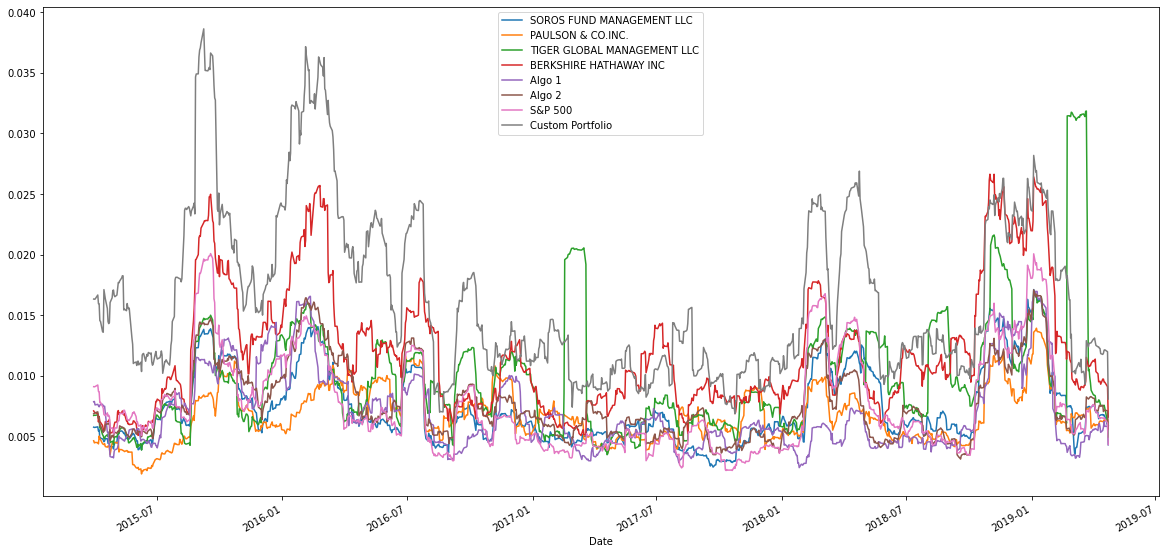

In [175]:
# Calculate and plot rolling Standard Deviation with a 21 day window.

all_combined_returns.rolling(window=21).std().plot(figsize= (20,10))

In [176]:
# Annualized Sharpe Ratios

Annualized_Sharpe_Ratio = ((all_combined_returns).mean()*252)/(all_combined_returns.std()*np.sqrt(252))
Annualized_Sharpe_Ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
Custom Portfolio               0.613236
dtype: float64

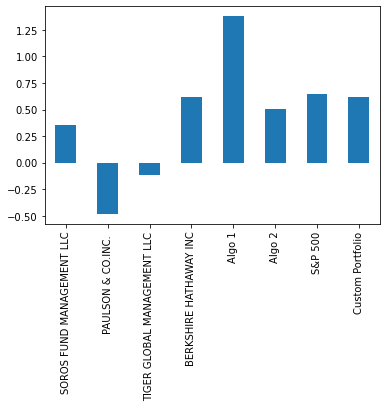

In [177]:
# Visualize the sharpe ratios as a bar plot

Annualized_Sharpe_Ratio.plot(kind="bar")

In [178]:
# Create a correlation analysis

correlation = all_combined_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.660358
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.491784
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.402647
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.593717
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.295849
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.709211
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.735929
Custom Portfolio,0.660358,0.491784,0.402647,0.593717,0.295849,0.709211,0.735929,1.000000


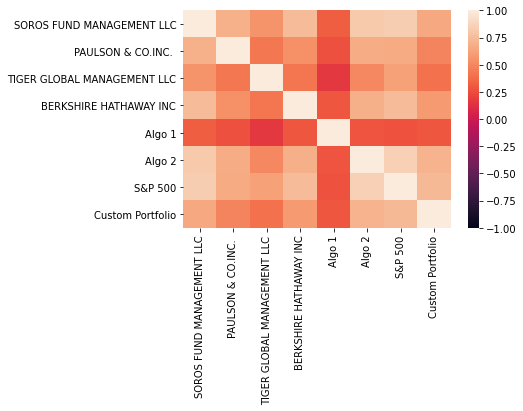

In [179]:
#Plotting correlation heatmap using the seaborn import.

sns.heatmap(correlation, vmin=-1, vmax=1)

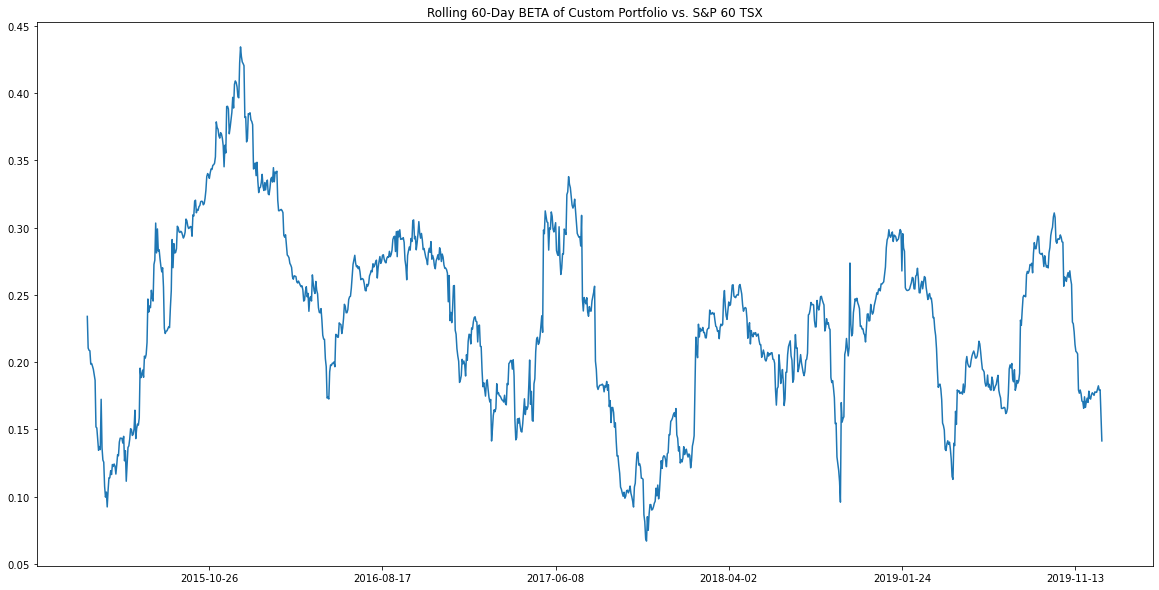

In [180]:
#Calculate and plot beta for your portfolio compared to the S&P 60 TSX.
# Created new dataframe in CSV file format using Google sheet via Googfinace formula in order to pull 
# S&P 60 TSX dats.
# within this section of code for TX60 I have cleaned the data, indexed it with Date, dropped null values
# and calculated daily returns in order to make sure data matches the custom data that it will be concat with.

TX60 = Path("Data/TX60.csv")
TX60_df= pd.read_csv(TX60, index_col="Date", infer_datetime_format=True, parse_dates=True)
TX60_df = TX60_df.sort_index()
TX60_df.index = pd.to_datetime(TX60_df.index).to_series().dt.strftime('%Y-%m-%d')
TX60_df = TX60_df.reset_index("Date")
TX60_df = TX60_df.pivot_table(values="Close", index="Date", columns="Symbols")
TX60_df = TX60_df.dropna()
TX60_df_DR = TX60_df.pct_change()
TX60_df_DR = TX60_df_DR.dropna()
#TX60_df_DR.head()

#Concat my custom portfolio with the new SP 60 TSX dataframe in order to cobine dataframe for easier manipulation.
TX60_custom_df = pd.concat([TX60_df_DR, custom_df], axis="columns", sort=False)
TX60_custom_df=TX60_custom_df.rename(columns={
    "avg":"Custom Portfolio"
})
TX60_custom_df = TX60_custom_df.dropna()

# Used the newly created TX60_custom_df dataframe to calculate and Plot BETA.
rolling_covariance = TX60_custom_df['Custom Portfolio'].rolling(window=60).cov(TX60_custom_df['TX60'])
rolling_variance = TX60_custom_df['Custom Portfolio'].rolling(window=60).var()
                                                                               
rolling_beta= rolling_covariance / rolling_variance 
rolling_beta.plot(figsize=(20,10), title="Rolling 60-Day BETA of Custom Portfolio vs. S&P 60 TSX")